# Exploratory-Data-Analysis of car features

# Step1- Import the dataset and necessary libraries

In [37]:
#import the required libraries

%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
#import the dataset

data = pd.read_csv("C:\\Users\\My PC\\Documents\\Ml internship\\data.csv") 

In [39]:
#get the first 5 rows from the dataset

data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [40]:
#Displays last 5 rows from the dataset

data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [41]:
#shape of the dataset

data.shape

(11914, 16)

In [42]:
#Get the information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [43]:
#Statistical summary

data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [44]:
#check datatype

data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [45]:
#Count the number of missing values

data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Step2
Column which are less relevence are Number of Doors and Engine Fuel type Because these columns does not effect on MSRP.

In [46]:
data = data.drop(['Number of Doors', 'Engine Fuel Type'], axis=1)
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,3916,34500


# Step 3
Renaming the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price"

In [47]:
data.rename(columns={"Engine HP":"HP",  "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"},inplace = True)
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,3916,34500


# Step 4
Check for any duplicates in the data, check for null values and missing data and remove
them.

In [48]:
#The number of rows which has duplicated data

data.duplicated().sum()

716

In [49]:
from pandas import DataFrame
data = DataFrame.drop_duplicates(data)

In [50]:
data.isnull().sum()

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission          0
Drive Mode            0
Market Category    3375
Vehicle Size          0
Vehicle Style         0
MPG-H                 0
MPG-C                 0
Popularity            0
Price                 0
dtype: int64

In [51]:
#Deleting the Market category column which has more missing values

data = data.drop(['Market Category'], axis=1)
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [52]:
#mean and median of HP column

print(data['HP'].mean())
print(data['HP'].median())

253.39545332015456
239.0


In [53]:
#Mean and Median of Cylinders Column

print(data['Cylinders'].mean())
print(data['Cylinders'].median())

5.665920487106018
6.0


In [54]:
#Filling the missing values by mean

data['HP'].fillna(data['HP'].mean(), inplace=True)

In [55]:
#Filling the missing values of Cylinders by mean 

data['Cylinders'].fillna(data['Cylinders'].mean(), inplace=True)

In [56]:
data.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

In [57]:
data.shape

(11198, 13)

## Step5
Plot graphs of various columns to check for outliers and remove those data points from the dataset.

<IPython.core.display.Javascript object>


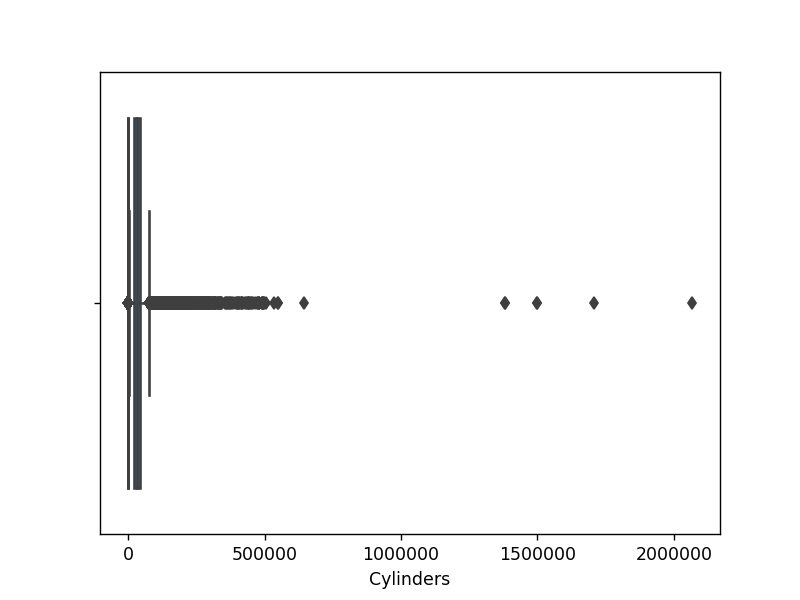

In [58]:
#Outliers

sns.boxplot(x=data['Price'])

In [59]:
sns.boxplot(x=data["HP"])

In [60]:
sns.boxplot(x=data['Cylinders'])

In [61]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21433.75
dtype: float64


In [62]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3+ 1.5 * IQR))).any(axis=1)]


In [63]:
data.shape

(8641, 13)

# Step 6
What car brands are the most represented in the dataset and find the average price among the top car brands.

<IPython.core.display.Javascript object>


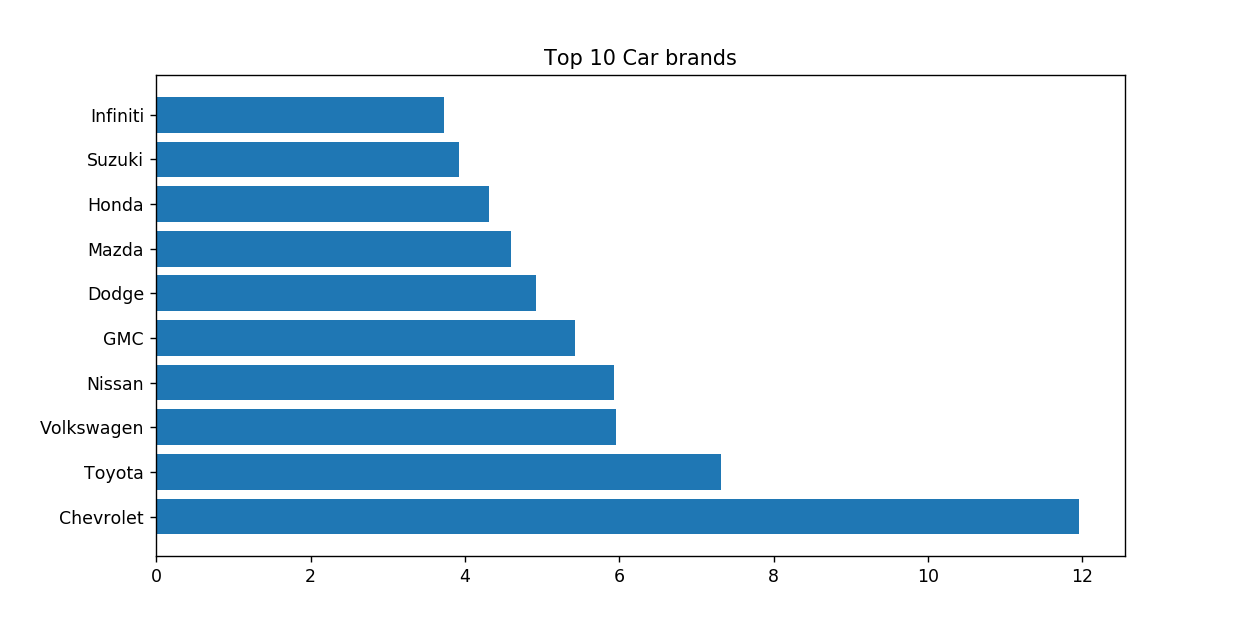

In [64]:
#percentage of car per brand
counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [65]:
prices = data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28207.045499
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Toyota      29022.944620
Volkswagen  29032.817476


In [66]:
data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330325,-0.094441,0.359909,0.323769,0.204623,0.592454
HP,0.330325,1.000000,0.740467,-0.464681,-0.562446,0.105840,0.742492
Cylinders,-0.094441,0.740467,1.000000,-0.697663,-0.750628,0.025241,0.391418
MPG-H,0.359909,-0.464681,-0.697663,1.000000,0.937947,0.082208,-0.127228
MPG-C,0.323769,-0.562446,-0.750628,0.937947,1.000000,0.071914,-0.201766
Popularity,0.204623,0.105840,0.025241,0.082208,0.071914,1.000000,0.115512
Price,0.592454,0.742492,0.391418,-0.127228,-0.201766,0.115512,1.000000


In [67]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#corrMatrix = data.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()